In [1]:
# GAN 모델을 이용해 단순히 랜덤한 숫자를 생성하는 아닌,
# 원하는 손글씨 숫자를 생성하는 모델을 만들어봅니다.
# 이런 방식으로 흑백 사진을 컬러로 만든다든가, 또는 선화를 채색한다든가 하는 응용이 가능합니다.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [2]:
#########
# 옵션 설정
######
total_epoch = 300
batch_size = 100
n_hidden = 256
n_input = 28 * 28
n_noise = 128
n_class = 10

In [3]:
#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32, [None, n_input])
# 노이즈와 실제 이미지에, 그에 해당하는 숫자에 대한 정보를 넣어주기 위해 사용합니다.
Y = tf.placeholder(tf.float32, [None, n_class])
Z = tf.placeholder(tf.float32, [None, n_noise])

In [4]:
def generator(noise, labels):
    with tf.variable_scope('generator'):
        # noise 값에 labels 정보를 추가합니다.
        inputs = tf.concat([noise, labels], 1)

        # TensorFlow 에서 제공하는 유틸리티 함수를 이용해 신경망을 매우 간단하게 구성할 수 있습니다.
        hidden = tf.layers.dense(inputs, n_hidden,
                                 activation=tf.nn.relu)
        output = tf.layers.dense(hidden, n_input,
                                 activation=tf.nn.sigmoid)

    return output


def discriminator(inputs, labels, reuse=None):
    with tf.variable_scope('discriminator') as scope:
        # 노이즈에서 생성한 이미지와 실제 이미지를 판별하는 모델의 변수를 동일하게 하기 위해,
        # 이전에 사용되었던 변수를 재사용하도록 합니다.
        if reuse:
            scope.reuse_variables()

        inputs = tf.concat([inputs, labels], 1)

        hidden = tf.layers.dense(inputs, n_hidden,
                                 activation=tf.nn.relu)
        output = tf.layers.dense(hidden, 1,
                                 activation=None)

    return output


def get_noise(batch_size, n_noise):
    return np.random.uniform(-1., 1., size=[batch_size, n_noise])


In [5]:
# 생성 모델과 판별 모델에 Y 즉, labels 정보를 추가하여
# labels 정보에 해당하는 이미지를 생성할 수 있도록 유도합니다.
G = generator(Z, Y)
D_real = discriminator(X, Y)
D_gene = discriminator(G, Y, True)

# 손실함수는 다음을 참고하여 GAN 논문에 나온 방식과는 약간 다르게 작성하였습니다.
# http://bamos.github.io/2016/08/09/deep-completion/
# 진짜 이미지를 판별하는 D_real 값은 1에 가깝도록,
# 가짜 이미지를 판별하는 D_gene 값은 0에 가깝도록 하는 손실 함수입니다.
loss_D_real = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(
                        logits=D_real, labels=tf.ones_like(D_real)))
loss_D_gene = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(
                        logits=D_gene, labels=tf.zeros_like(D_gene)))
# loss_D_real 과 loss_D_gene 을 더한 뒤 이 값을 최소화 하도록 최적화합니다.
loss_D = loss_D_real + loss_D_gene
# 가짜 이미지를 진짜에 가깝게 만들도록 생성망을 학습시키기 위해, D_gene 을 최대한 1에 가깝도록 만드는 손실함수입니다.
loss_G = tf.reduce_mean(
                    tf.nn.sigmoid_cross_entropy_with_logits(
                        logits=D_gene, labels=tf.ones_like(D_gene)))

# TensorFlow 에서 제공하는 유틸리티 함수를 이용해
# discriminator 와 generator scope 에서 사용된 변수들을 쉽게 가져올 수 있습니다.
vars_D = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                           scope='discriminator')
vars_G = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,
                           scope='generator')

train_D = tf.train.AdamOptimizer().minimize(loss_D,
                                            var_list=vars_D)
train_G = tf.train.AdamOptimizer().minimize(loss_G,
                                            var_list=vars_G)


Epoch: 0000 D loss: 0.002672 G loss: 7.996


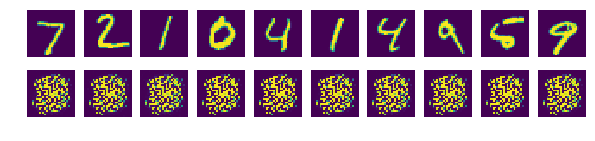

Epoch: 0001 D loss: 0.00751 G loss: 6.819
Epoch: 0002 D loss: 0.01392 G loss: 8.873
Epoch: 0003 D loss: 0.001084 G loss: 9.582
Epoch: 0004 D loss: 0.01492 G loss: 8.447
Epoch: 0005 D loss: 0.002685 G loss: 8.798
Epoch: 0006 D loss: 0.00706 G loss: 9.927
Epoch: 0007 D loss: 0.0126 G loss: 7.58
Epoch: 0008 D loss: 0.08334 G loss: 7.366
Epoch: 0009 D loss: 0.0137 G loss: 9.111


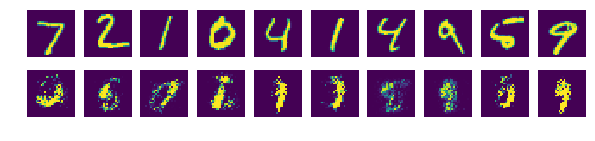

Epoch: 0010 D loss: 0.07845 G loss: 5.202
Epoch: 0011 D loss: 0.1219 G loss: 5.876
Epoch: 0012 D loss: 0.1551 G loss: 5.055
Epoch: 0013 D loss: 0.3038 G loss: 5.474
Epoch: 0014 D loss: 0.4358 G loss: 3.821
Epoch: 0015 D loss: 0.4777 G loss: 3.431
Epoch: 0016 D loss: 0.3423 G loss: 4.307
Epoch: 0017 D loss: 0.3879 G loss: 4.542
Epoch: 0018 D loss: 0.4491 G loss: 4.051
Epoch: 0019 D loss: 0.7338 G loss: 3.953


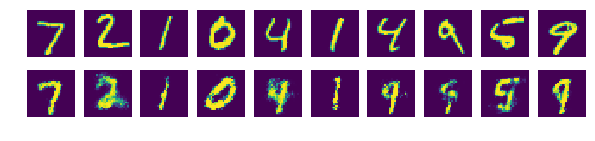

Epoch: 0020 D loss: 0.4635 G loss: 2.829
Epoch: 0021 D loss: 0.5398 G loss: 2.629
Epoch: 0022 D loss: 0.6685 G loss: 2.809
Epoch: 0023 D loss: 0.4905 G loss: 3.107
Epoch: 0024 D loss: 0.7149 G loss: 3.67
Epoch: 0025 D loss: 0.6655 G loss: 2.605
Epoch: 0026 D loss: 0.5023 G loss: 3.454
Epoch: 0027 D loss: 0.6028 G loss: 2.776
Epoch: 0028 D loss: 0.7358 G loss: 2.432
Epoch: 0029 D loss: 0.7655 G loss: 2.336


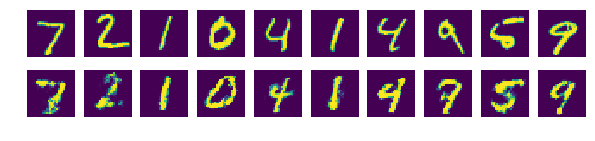

Epoch: 0030 D loss: 0.598 G loss: 2.473
Epoch: 0031 D loss: 0.6129 G loss: 2.523
Epoch: 0032 D loss: 0.7452 G loss: 2.262
Epoch: 0033 D loss: 0.6329 G loss: 2.14
Epoch: 0034 D loss: 0.6957 G loss: 2.502
Epoch: 0035 D loss: 0.7091 G loss: 2.459
Epoch: 0036 D loss: 0.6443 G loss: 2.583
Epoch: 0037 D loss: 0.8167 G loss: 2.174
Epoch: 0038 D loss: 0.6826 G loss: 1.95
Epoch: 0039 D loss: 0.7029 G loss: 2.354


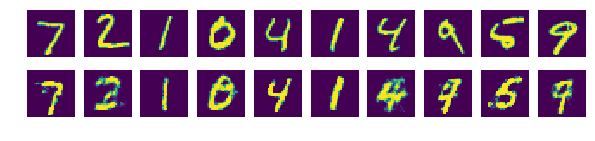

Epoch: 0040 D loss: 0.7195 G loss: 2.234
Epoch: 0041 D loss: 0.6768 G loss: 2.299
Epoch: 0042 D loss: 0.7153 G loss: 2.138
Epoch: 0043 D loss: 0.6308 G loss: 2.164
Epoch: 0044 D loss: 0.7891 G loss: 2.219
Epoch: 0045 D loss: 0.6931 G loss: 2.015
Epoch: 0046 D loss: 0.7064 G loss: 2.343
Epoch: 0047 D loss: 0.8959 G loss: 1.958
Epoch: 0048 D loss: 0.6438 G loss: 2.258
Epoch: 0049 D loss: 0.6709 G loss: 2.127


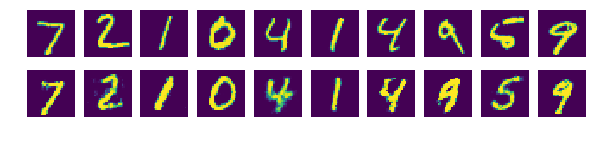

Epoch: 0050 D loss: 0.8365 G loss: 2.282
Epoch: 0051 D loss: 0.7553 G loss: 2.113
Epoch: 0052 D loss: 0.6354 G loss: 2.331
Epoch: 0053 D loss: 0.7606 G loss: 1.972
Epoch: 0054 D loss: 0.6674 G loss: 2.035
Epoch: 0055 D loss: 0.7468 G loss: 1.906
Epoch: 0056 D loss: 0.7268 G loss: 2.01
Epoch: 0057 D loss: 0.7188 G loss: 1.977
Epoch: 0058 D loss: 0.8691 G loss: 2.08
Epoch: 0059 D loss: 0.6966 G loss: 2.121


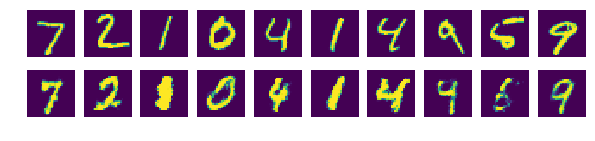

Epoch: 0060 D loss: 0.695 G loss: 2.034
Epoch: 0061 D loss: 0.5626 G loss: 1.912
Epoch: 0062 D loss: 0.7119 G loss: 1.85
Epoch: 0063 D loss: 0.7558 G loss: 1.983
Epoch: 0064 D loss: 0.7604 G loss: 1.863
Epoch: 0065 D loss: 0.7396 G loss: 1.813
Epoch: 0066 D loss: 0.7928 G loss: 2.428
Epoch: 0067 D loss: 0.7062 G loss: 1.866
Epoch: 0068 D loss: 0.8616 G loss: 1.941
Epoch: 0069 D loss: 0.7297 G loss: 2.165


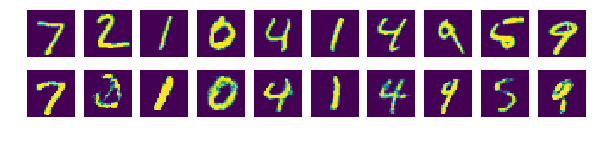

Epoch: 0070 D loss: 0.7106 G loss: 2.129
Epoch: 0071 D loss: 0.7189 G loss: 2.517
Epoch: 0072 D loss: 0.6483 G loss: 2.196
Epoch: 0073 D loss: 0.8149 G loss: 1.975
Epoch: 0074 D loss: 0.8701 G loss: 1.86
Epoch: 0075 D loss: 0.9257 G loss: 1.961
Epoch: 0076 D loss: 0.8536 G loss: 2.119
Epoch: 0077 D loss: 0.7296 G loss: 2.016
Epoch: 0078 D loss: 0.7084 G loss: 2.07
Epoch: 0079 D loss: 0.851 G loss: 2.357


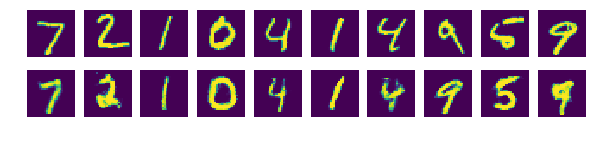

Epoch: 0080 D loss: 0.6482 G loss: 2.174
Epoch: 0081 D loss: 0.8586 G loss: 1.921
Epoch: 0082 D loss: 0.7066 G loss: 2.158
Epoch: 0083 D loss: 0.7469 G loss: 2.153
Epoch: 0084 D loss: 0.7241 G loss: 2.464
Epoch: 0085 D loss: 0.7615 G loss: 2.047
Epoch: 0086 D loss: 0.677 G loss: 2.025
Epoch: 0087 D loss: 0.7471 G loss: 1.689
Epoch: 0088 D loss: 0.7411 G loss: 2.132
Epoch: 0089 D loss: 0.8348 G loss: 2.189


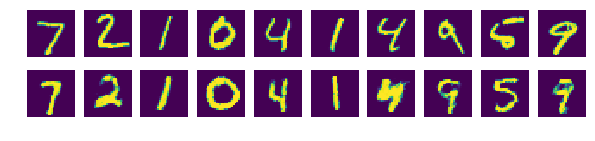

Epoch: 0090 D loss: 0.6865 G loss: 1.917
Epoch: 0091 D loss: 0.6514 G loss: 2.322
Epoch: 0092 D loss: 0.7934 G loss: 2.201
Epoch: 0093 D loss: 0.6336 G loss: 2.264
Epoch: 0094 D loss: 0.8252 G loss: 1.759
Epoch: 0095 D loss: 0.7308 G loss: 1.712
Epoch: 0096 D loss: 0.7086 G loss: 1.94
Epoch: 0097 D loss: 0.6429 G loss: 2.023
Epoch: 0098 D loss: 0.6824 G loss: 2.428
Epoch: 0099 D loss: 0.7003 G loss: 2.423


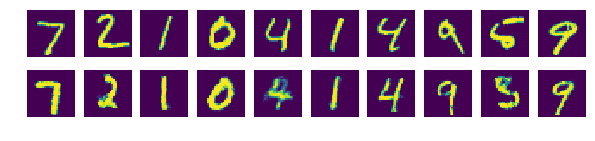

Epoch: 0100 D loss: 0.6359 G loss: 2.571
Epoch: 0101 D loss: 0.7053 G loss: 1.921
Epoch: 0102 D loss: 0.794 G loss: 2.231
Epoch: 0103 D loss: 0.8472 G loss: 2.005
Epoch: 0104 D loss: 0.6273 G loss: 1.828
Epoch: 0105 D loss: 0.6996 G loss: 1.859
Epoch: 0106 D loss: 0.7926 G loss: 1.904
Epoch: 0107 D loss: 0.7047 G loss: 2.092
Epoch: 0108 D loss: 0.7536 G loss: 2.23
Epoch: 0109 D loss: 0.5752 G loss: 2.41


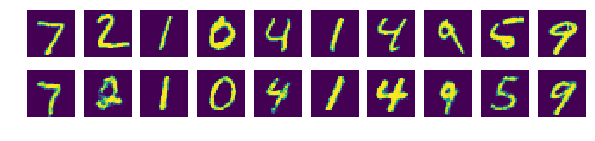

Epoch: 0110 D loss: 0.7942 G loss: 1.928
Epoch: 0111 D loss: 0.6222 G loss: 2.436
Epoch: 0112 D loss: 0.8123 G loss: 2.063
Epoch: 0113 D loss: 0.6627 G loss: 2.095
Epoch: 0114 D loss: 0.677 G loss: 2.023
Epoch: 0115 D loss: 0.7008 G loss: 2.215
Epoch: 0116 D loss: 0.767 G loss: 1.805
Epoch: 0117 D loss: 0.6475 G loss: 2.18
Epoch: 0118 D loss: 0.891 G loss: 2.058
Epoch: 0119 D loss: 0.811 G loss: 1.816


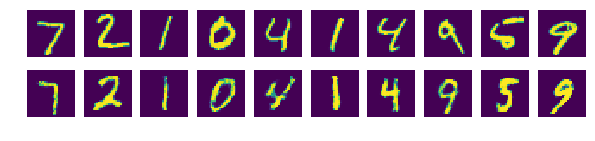

Epoch: 0120 D loss: 0.6697 G loss: 2.378
Epoch: 0121 D loss: 0.727 G loss: 1.974
Epoch: 0122 D loss: 0.6626 G loss: 2.236
Epoch: 0123 D loss: 0.7717 G loss: 1.78
Epoch: 0124 D loss: 0.7112 G loss: 2.258
Epoch: 0125 D loss: 0.7301 G loss: 2.266
Epoch: 0126 D loss: 0.7552 G loss: 2.102
Epoch: 0127 D loss: 0.866 G loss: 1.837
Epoch: 0128 D loss: 0.8049 G loss: 2.168
Epoch: 0129 D loss: 0.7239 G loss: 2.029


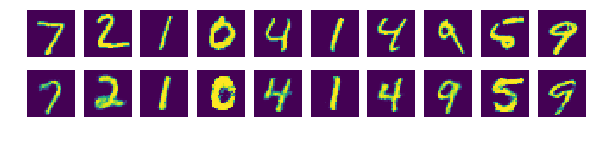

Epoch: 0130 D loss: 0.8126 G loss: 1.932
Epoch: 0131 D loss: 0.6587 G loss: 2.228
Epoch: 0132 D loss: 0.8284 G loss: 1.824
Epoch: 0133 D loss: 0.8024 G loss: 1.99
Epoch: 0134 D loss: 0.768 G loss: 2.215
Epoch: 0135 D loss: 0.6573 G loss: 2.029
Epoch: 0136 D loss: 0.6349 G loss: 2.17
Epoch: 0137 D loss: 0.7399 G loss: 1.818
Epoch: 0138 D loss: 0.6447 G loss: 2.455
Epoch: 0139 D loss: 0.8246 G loss: 1.997


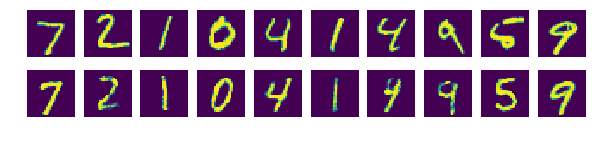

Epoch: 0140 D loss: 0.8089 G loss: 2.034
Epoch: 0141 D loss: 0.7034 G loss: 2.031
Epoch: 0142 D loss: 0.7831 G loss: 2.067
Epoch: 0143 D loss: 0.7209 G loss: 1.833
Epoch: 0144 D loss: 0.7359 G loss: 2.019
Epoch: 0145 D loss: 0.8664 G loss: 1.862
Epoch: 0146 D loss: 0.7221 G loss: 2.075
Epoch: 0147 D loss: 0.815 G loss: 1.987
Epoch: 0148 D loss: 0.7383 G loss: 2.012
Epoch: 0149 D loss: 0.674 G loss: 1.909


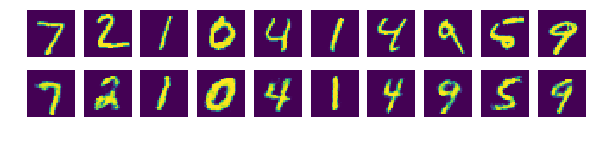

Epoch: 0150 D loss: 0.6897 G loss: 2.217
Epoch: 0151 D loss: 0.6403 G loss: 2.288
Epoch: 0152 D loss: 0.5589 G loss: 2.007
Epoch: 0153 D loss: 0.6856 G loss: 2.182
Epoch: 0154 D loss: 0.469 G loss: 2.584
Epoch: 0155 D loss: 0.7983 G loss: 2.065
Epoch: 0156 D loss: 0.5808 G loss: 2.134
Epoch: 0157 D loss: 0.7586 G loss: 2.123
Epoch: 0158 D loss: 0.7382 G loss: 1.954
Epoch: 0159 D loss: 0.7171 G loss: 1.983


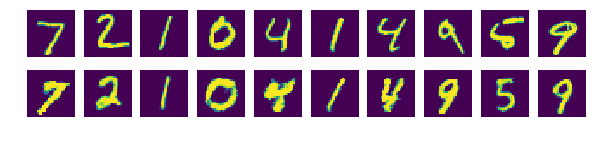

Epoch: 0160 D loss: 0.6489 G loss: 2.283
Epoch: 0161 D loss: 0.6819 G loss: 2.026
Epoch: 0162 D loss: 0.624 G loss: 2.307
Epoch: 0163 D loss: 0.6624 G loss: 2.115
Epoch: 0164 D loss: 0.6189 G loss: 2.254
Epoch: 0165 D loss: 0.5855 G loss: 2.485
Epoch: 0166 D loss: 0.7952 G loss: 2.158
Epoch: 0167 D loss: 0.6613 G loss: 2.383
Epoch: 0168 D loss: 0.6517 G loss: 2.136
Epoch: 0169 D loss: 0.6656 G loss: 2.179


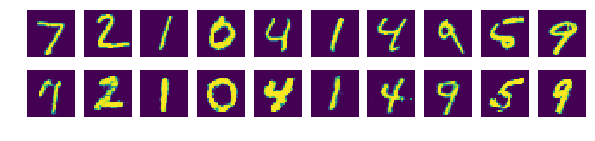

Epoch: 0170 D loss: 0.6266 G loss: 2.061
Epoch: 0171 D loss: 0.6331 G loss: 2.444
Epoch: 0172 D loss: 0.6021 G loss: 2.127
Epoch: 0173 D loss: 0.5779 G loss: 2.028
Epoch: 0174 D loss: 0.6231 G loss: 2.615
Epoch: 0175 D loss: 0.807 G loss: 1.742
Epoch: 0176 D loss: 0.7649 G loss: 2.409
Epoch: 0177 D loss: 0.8103 G loss: 2.214
Epoch: 0178 D loss: 0.786 G loss: 1.858
Epoch: 0179 D loss: 0.6388 G loss: 2.239


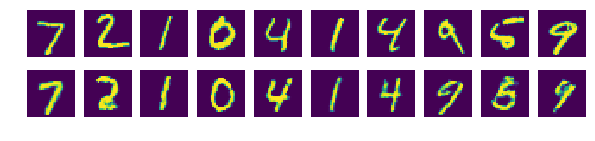

Epoch: 0180 D loss: 0.6684 G loss: 2.326
Epoch: 0181 D loss: 0.6827 G loss: 2.24
Epoch: 0182 D loss: 0.7714 G loss: 2.205
Epoch: 0183 D loss: 0.6846 G loss: 1.964
Epoch: 0184 D loss: 0.7555 G loss: 2.163
Epoch: 0185 D loss: 0.6767 G loss: 2.339
Epoch: 0186 D loss: 0.6376 G loss: 2.416
Epoch: 0187 D loss: 0.6336 G loss: 2.256
Epoch: 0188 D loss: 0.7896 G loss: 2.347
Epoch: 0189 D loss: 0.7077 G loss: 1.816


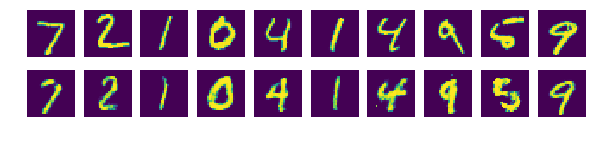

Epoch: 0190 D loss: 0.6802 G loss: 2.086
Epoch: 0191 D loss: 0.5771 G loss: 2.746
Epoch: 0192 D loss: 0.7971 G loss: 1.994
Epoch: 0193 D loss: 0.7281 G loss: 2.114
Epoch: 0194 D loss: 0.6802 G loss: 1.912
Epoch: 0195 D loss: 0.6826 G loss: 2.147
Epoch: 0196 D loss: 0.6357 G loss: 2.215
Epoch: 0197 D loss: 0.8754 G loss: 1.958
Epoch: 0198 D loss: 0.6276 G loss: 2.353
Epoch: 0199 D loss: 0.6481 G loss: 2.575


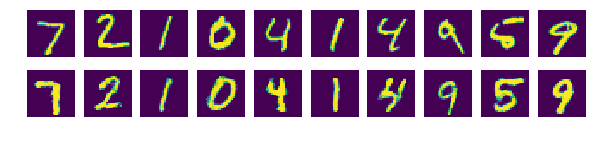

Epoch: 0200 D loss: 0.6514 G loss: 2.221
Epoch: 0201 D loss: 0.6683 G loss: 2.439
Epoch: 0202 D loss: 0.8456 G loss: 1.878
Epoch: 0203 D loss: 0.5811 G loss: 2.399
Epoch: 0204 D loss: 0.73 G loss: 2.375
Epoch: 0205 D loss: 0.6002 G loss: 2.358
Epoch: 0206 D loss: 0.6446 G loss: 2.35
Epoch: 0207 D loss: 0.7406 G loss: 2.107
Epoch: 0208 D loss: 0.6791 G loss: 2.115
Epoch: 0209 D loss: 0.7539 G loss: 2.27


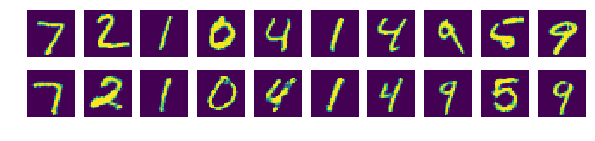

Epoch: 0210 D loss: 0.718 G loss: 2.191
Epoch: 0211 D loss: 0.6326 G loss: 2.517
Epoch: 0212 D loss: 0.5082 G loss: 2.681
Epoch: 0213 D loss: 0.8629 G loss: 2.239
Epoch: 0214 D loss: 0.6076 G loss: 2.131
Epoch: 0215 D loss: 0.5646 G loss: 2.335
Epoch: 0216 D loss: 0.6535 G loss: 2.23
Epoch: 0217 D loss: 0.7745 G loss: 2.184
Epoch: 0218 D loss: 0.7319 G loss: 2.016
Epoch: 0219 D loss: 0.7525 G loss: 2.381


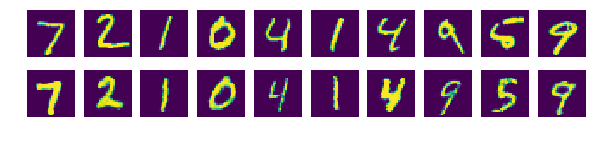

Epoch: 0220 D loss: 0.6319 G loss: 2.319
Epoch: 0221 D loss: 0.5154 G loss: 2.249
Epoch: 0222 D loss: 0.6202 G loss: 2.553
Epoch: 0223 D loss: 0.78 G loss: 1.882
Epoch: 0224 D loss: 0.6864 G loss: 2.323
Epoch: 0225 D loss: 0.7173 G loss: 2.006
Epoch: 0226 D loss: 0.6512 G loss: 2.176
Epoch: 0227 D loss: 0.7964 G loss: 2.088
Epoch: 0228 D loss: 0.7105 G loss: 2.197
Epoch: 0229 D loss: 0.7662 G loss: 2.236


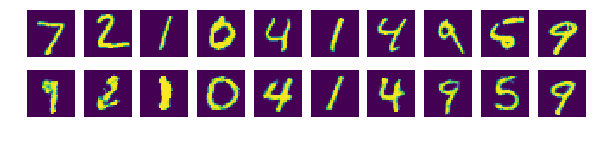

Epoch: 0230 D loss: 0.7354 G loss: 2.184
Epoch: 0231 D loss: 0.688 G loss: 2.465
Epoch: 0232 D loss: 0.6492 G loss: 2.298
Epoch: 0233 D loss: 0.6187 G loss: 2.551
Epoch: 0234 D loss: 0.6254 G loss: 2.446
Epoch: 0235 D loss: 0.7301 G loss: 2.443
Epoch: 0236 D loss: 0.6996 G loss: 2.171
Epoch: 0237 D loss: 0.6387 G loss: 2.673
Epoch: 0238 D loss: 0.7041 G loss: 2.262
Epoch: 0239 D loss: 0.5955 G loss: 2.105


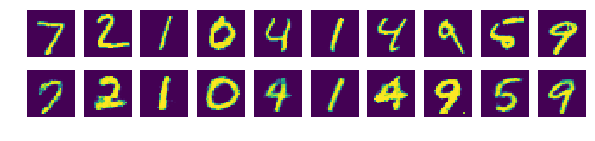

Epoch: 0240 D loss: 0.7478 G loss: 2.083
Epoch: 0241 D loss: 0.6312 G loss: 2.542
Epoch: 0242 D loss: 0.7029 G loss: 2.393
Epoch: 0243 D loss: 0.4818 G loss: 2.507
Epoch: 0244 D loss: 0.655 G loss: 2.835
Epoch: 0245 D loss: 0.6508 G loss: 2.437
Epoch: 0246 D loss: 0.6599 G loss: 2.361
Epoch: 0247 D loss: 0.5564 G loss: 2.267
Epoch: 0248 D loss: 0.617 G loss: 2.594
Epoch: 0249 D loss: 0.7585 G loss: 2.294


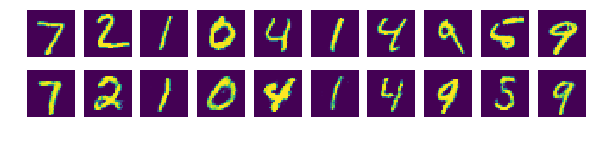

Epoch: 0250 D loss: 0.6797 G loss: 2.463
Epoch: 0251 D loss: 0.6895 G loss: 2.384
Epoch: 0252 D loss: 0.4686 G loss: 2.63
Epoch: 0253 D loss: 0.6811 G loss: 2.667
Epoch: 0254 D loss: 0.5435 G loss: 2.625
Epoch: 0255 D loss: 0.6046 G loss: 2.595
Epoch: 0256 D loss: 0.5539 G loss: 2.219
Epoch: 0257 D loss: 0.6048 G loss: 2.834
Epoch: 0258 D loss: 0.5761 G loss: 2.504
Epoch: 0259 D loss: 0.7133 G loss: 2.464


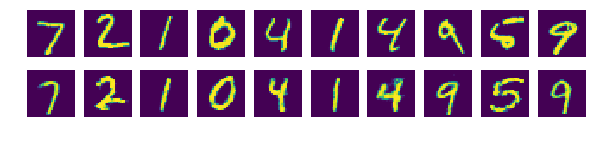

Epoch: 0260 D loss: 0.6549 G loss: 2.483
Epoch: 0261 D loss: 0.5181 G loss: 2.517
Epoch: 0262 D loss: 0.6007 G loss: 2.343
Epoch: 0263 D loss: 0.7121 G loss: 2.287
Epoch: 0264 D loss: 0.7223 G loss: 2.359
Epoch: 0265 D loss: 0.6016 G loss: 2.595
Epoch: 0266 D loss: 0.5839 G loss: 2.52
Epoch: 0267 D loss: 0.6129 G loss: 2.515
Epoch: 0268 D loss: 0.5837 G loss: 2.098
Epoch: 0269 D loss: 0.5095 G loss: 2.886


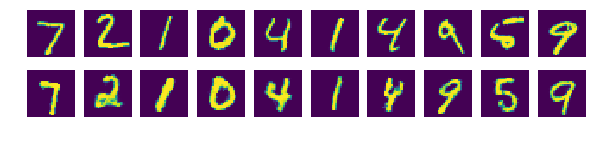

Epoch: 0270 D loss: 0.5283 G loss: 2.258
Epoch: 0271 D loss: 0.6069 G loss: 2.581
Epoch: 0272 D loss: 0.5533 G loss: 2.6
Epoch: 0273 D loss: 0.6431 G loss: 2.266
Epoch: 0274 D loss: 0.3857 G loss: 2.626
Epoch: 0275 D loss: 0.5521 G loss: 2.433
Epoch: 0276 D loss: 0.7177 G loss: 2.016
Epoch: 0277 D loss: 0.6188 G loss: 2.452
Epoch: 0278 D loss: 0.6157 G loss: 2.685
Epoch: 0279 D loss: 0.5157 G loss: 2.638


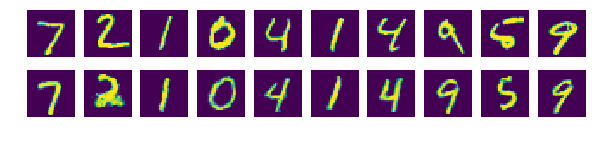

Epoch: 0280 D loss: 0.7233 G loss: 2.603
Epoch: 0281 D loss: 0.6464 G loss: 2.308
Epoch: 0282 D loss: 0.576 G loss: 2.527
Epoch: 0283 D loss: 0.6455 G loss: 2.369
Epoch: 0284 D loss: 0.4928 G loss: 2.92
Epoch: 0285 D loss: 0.5711 G loss: 2.478


In [ ]:
#########
# 신경망 모델 학습
######
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = int(mnist.train.num_examples/batch_size)
loss_val_D, loss_val_G = 0, 0

for epoch in range(total_epoch):
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        noise = get_noise(batch_size, n_noise)

        _, loss_val_D = sess.run([train_D, loss_D],
                                 feed_dict={X: batch_xs, Y: batch_ys, Z: noise})
        _, loss_val_G = sess.run([train_G, loss_G],
                                 feed_dict={Y: batch_ys, Z: noise})

    print('Epoch:', '%04d' % epoch,
          'D loss: {:.4}'.format(loss_val_D),
          'G loss: {:.4}'.format(loss_val_G))

    #########
    # 학습이 되어가는 모습을 보기 위해 주기적으로 레이블에 따른 이미지를 생성하여 저장
    ######
    if epoch == 0 or (epoch + 1) % 10 == 0:
        sample_size = 10
        noise = get_noise(sample_size, n_noise)
        samples = sess.run(G,
                           feed_dict={Y: mnist.test.labels[:sample_size],
                                      Z: noise})

        fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

        for i in range(sample_size):
            ax[0][i].set_axis_off()
            ax[1][i].set_axis_off()

            ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
            ax[1][i].imshow(np.reshape(samples[i], (28, 28)))

        #plt.savefig('samples2/{}.png'.format(str(epoch).zfill(3)), bbox_inches='tight')
        plt.show()
        plt.close(fig)
